In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import nltk
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

nltk.download(["names",
               "stopwords",
               "twitter_samples",
               "movie_reviews",
               "punkt_tab"
              ])

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

[nltk_data] Downloading package names to /home/tomy07417/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tomy07417/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/tomy07417/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/tomy07417/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/tomy07417/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df['location'].value_counts()
train_df['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [5]:
desastres = train_df['text'][train_df['target'] == 1]
no_desastres = train_df['text'][train_df['target'] == 0]

## Análisis de las palabras más usadas en tuits que hablan de desastres

In [6]:
tweets_tokenizer = nltk.tokenize.TweetTokenizer().tokenize
vectorizer_desastres = CountVectorizer(lowercase=True, stop_words=list(stopwords.words('english')), max_features=200, tokenizer=tweets_tokenizer)
vectorizer_no_desastres = CountVectorizer(lowercase=True, stop_words=list(stopwords.words('english')), max_features=200, tokenizer=tweets_tokenizer)

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
import re
nlp = spacy.load("en_core_web_sm")

def limpiar_texto(texto):
    # 1️⃣ Reemplazar URLs por una etiqueta común antes de quitarlas (si querés contarlas)
    texto = re.sub(r"http\S+|www\S+", " URL ", texto)   # usa esta si querés conservar la noción de URL

    # 3️⃣ Normalizar espacios
    texto = re.sub(r"\s+", " ", texto).strip()

    # 4️⃣ Pasar todo a minúsculas antes de procesar
    texto = texto.lower()

    # 5️⃣ Procesar con spaCy
    doc = nlp(texto)

    # 6️⃣ Lematizar y eliminar stopwords, tokens cortos y signos
    lemas = [
        token.lemma_
        for token in doc
        if not token.is_stop and len(token) > 2 and token.is_alpha
    ]

    return " ".join(lemas)


join_desastres = " ".join(train_df.loc[train_df['target'] == 1, 'text'])
join_desastres_limpio = limpiar_texto(join_desastres)
busqueda_desastres = vectorizer_desastres.fit_transform([join_desastres_limpio])

join_no_desastres = " ".join(train_df.loc[train_df['target'] == 0, 'text'])
join_no_desastres_limpio = limpiar_texto(join_no_desastres)
busqueda_no_desastres = vectorizer_no_desastres.fit_transform([join_no_desastres_limpio])

/home/tomy07417/data-science/ml/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Resultado:
  - Se encontro un top de palabras
  - Se encontro que el 79% de los desastres contienen una url a una página mientras que los no desastres el 51% tiene una url.

In [9]:
words_desastres = vectorizer_desastres.get_feature_names_out()

frequencias_desastres = busqueda_desastres.toarray().flatten()
sorted_indices = frequencias_desastres.argsort()[::-1]

# Mostramos las 20 palabras más frecuentes
for idx in sorted_indices[:50]:
    print(f"{words_desastres[idx]}: {frequencias_desastres[idx]}")

    with open("words_desastres.txt", "w", encoding="utf-8") as f:
        for i in sorted_indices[1:]:
            f.write(f"{words_desastres[i]}\n")

url: 2521
fire: 266
kill: 155
news: 135
disaster: 119
california: 115
bomb: 113
suicide: 112
crash: 112
year: 110
police: 109
amp: 106
people: 106
family: 105
attack: 104
home: 103
like: 101
train: 101
storm: 95
hiroshima: 90
building: 90
flood: 86
burn: 83
emergency: 77
wildfire: 77
car: 75
accident: 73
video: 72
nuclear: 72
bombing: 72
collapse: 70
old: 69
death: 66
report: 65
cause: 64
go: 64
northern: 64
dead: 63
man: 63
legionnaire: 62
war: 61
bomber: 61
watch: 61
evacuate: 59
confirm: 58
new: 58
typhoon: 57
life: 57
obama: 56
say: 56


In [10]:
words_no_desastres = vectorizer_no_desastres.get_feature_names_out()

frequencias_no_desastres = busqueda_no_desastres.toarray().flatten()
sorted_indices_no = frequencias_no_desastres.argsort()[::-1]

# Mostramos las 20 palabras más frecuentes
for idx in sorted_indices_no[:50]:
    print(f"{words_no_desastres[idx]}: {frequencias_no_desastres[idx]}")

url: 2207
like: 294
amp: 192
new: 172
go: 158
get: 144
body: 118
good: 117
love: 116
come: 107
time: 102
video: 102
day: 102
know: 102
think: 99
want: 98
bag: 96
scream: 96
burn: 93
people: 92
look: 90
fire: 90
emergency: 82
let: 82
wreck: 81
man: 81
need: 72
world: 71
work: 70
drown: 70
panic: 67
life: 67
year: 66
blow: 65
feel: 63
lol: 62
explode: 60
destroy: 60
sink: 60
way: 60
crush: 59
watch: 58
say: 58
news: 57
help: 56
injury: 55
survive: 54
thing: 54
reddit: 54
fuck: 54


In [25]:
# Porcentaje de url en los tweets de desastres y no desastres
url_desastres = train_df.loc[train_df['target'] == 1, 'text'].str.contains(r"http\S+|www\S+").sum()
url_no_desastres = train_df.loc[train_df['target'] == 0, 'text'].str.contains(r"http\S+|www\S+").sum()

[url_desastres / len(desastres), url_no_desastres / len(no_desastres)]

[np.float64(0.664628553959034), np.float64(0.41501612160294793)]

In [26]:
hashtag_desastres = train_df.loc[train_df['target'] == 1, 'text'].str.contains(r"#\S+").sum()
hashtag_no_desastres = train_df.loc[train_df['target'] == 0, 'text'].str.contains(r"#\S+").sum()

[hashtag_desastres / len(desastres), hashtag_no_desastres / len(no_desastres)]

[np.float64(0.26627942525221643), np.float64(0.20382312298479963)]

## Análisis del sentimiento de los textos (no es optimo)

  * **Conclusión**: Con este modelo parece que no hay diferencia aunque se puede observar que los tuits de desastres tienden a ser más negativos.

In [11]:
sia = SentimentIntensityAnalyzer()

casos_desastre = []
casos_no_desastre = []

for texto in desastres:
  casos_desastre.append(sia.polarity_scores(texto))

for texto in no_desastres:
  casos_no_desastre.append(sia.polarity_scores(texto))

In [12]:
desastre_sentimientos_df = pd.DataFrame(casos_desastre)
no_desastre_sentimientos_df = pd.DataFrame(casos_no_desastre)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=desastre_sentimientos_df['pos'],
    y=desastre_sentimientos_df['compound'],
    z=desastre_sentimientos_df['neg'],
    mode='markers',
    marker=dict(color='green', size=5),
    name='Desastres'
))

fig.add_trace(go.Scatter3d(
    x=no_desastre_sentimientos_df['pos'],
    y=no_desastre_sentimientos_df['compound'],
    z=no_desastre_sentimientos_df['neg'],
    mode='markers',
    marker=dict(color='red', size=5, symbol='diamond'),
    name='No Desastres'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Positivo',
        yaxis_title='Neutro',
        zaxis_title='Negativo'
    ),
    title='Análisis de Sentimiento 3D: Desastres vs No Desastres'
)

fig.show()


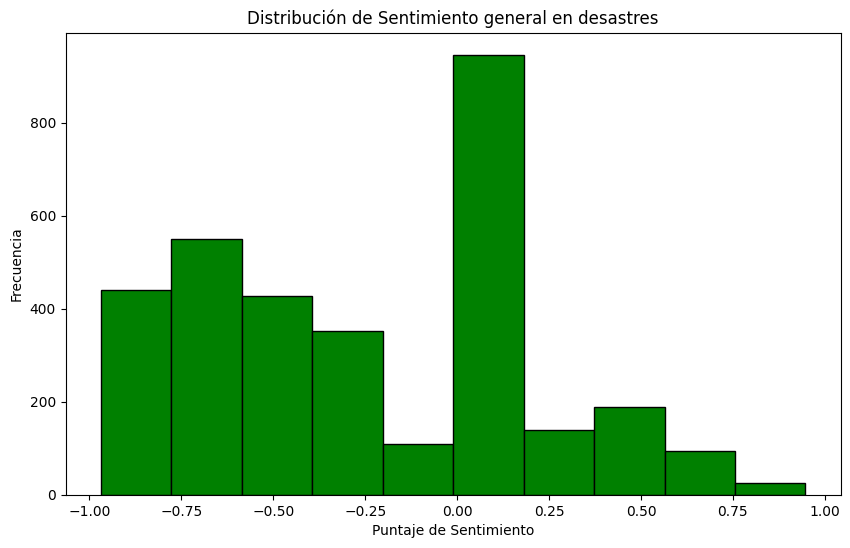

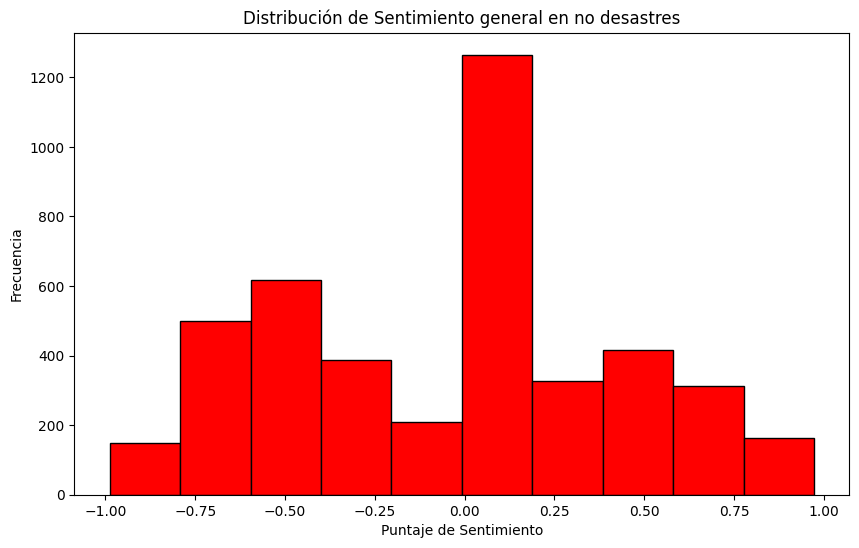

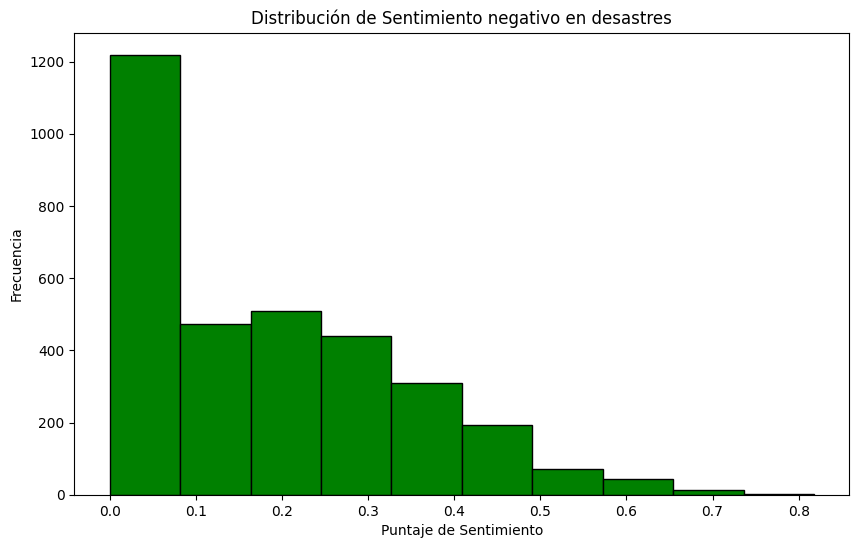

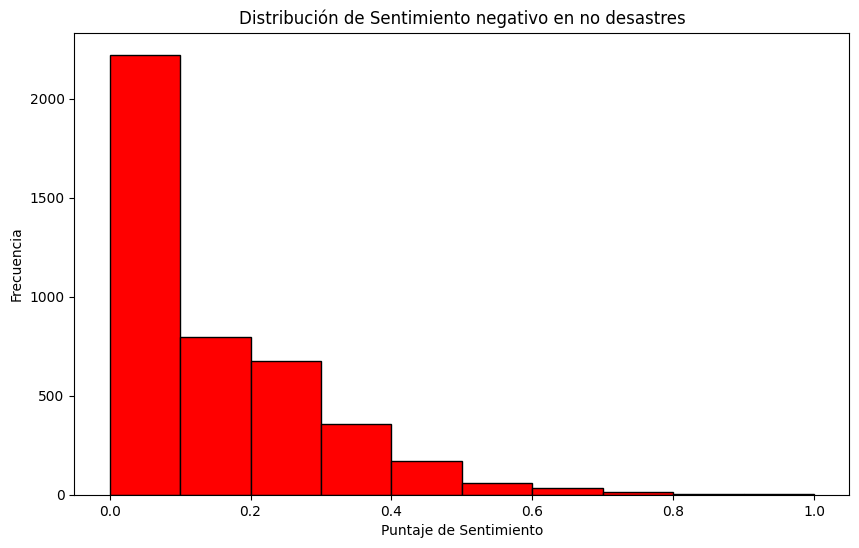

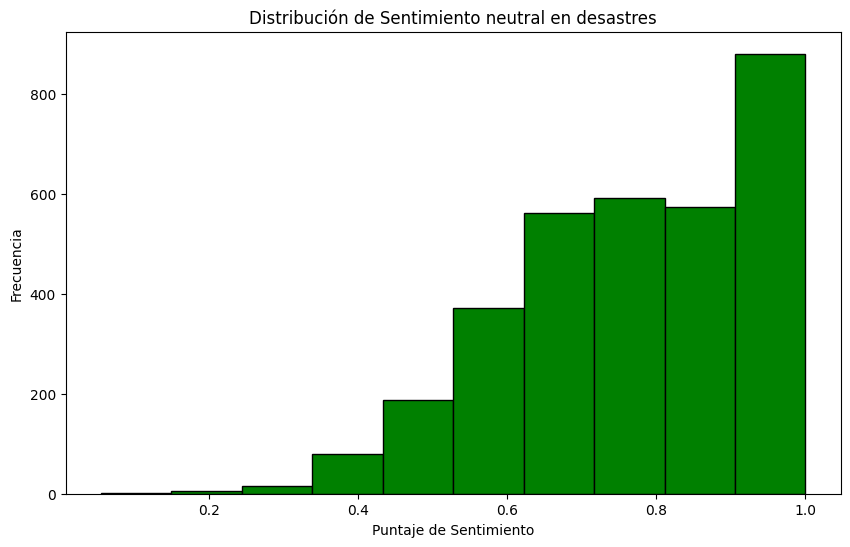

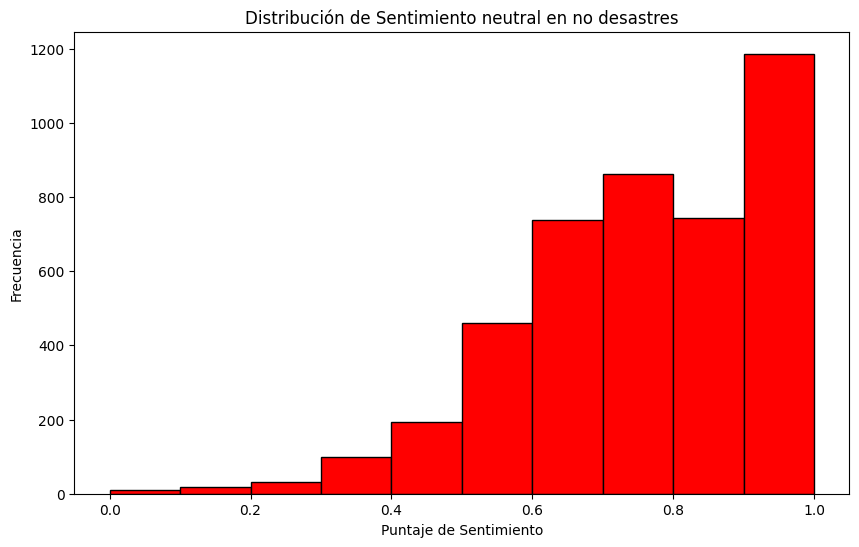

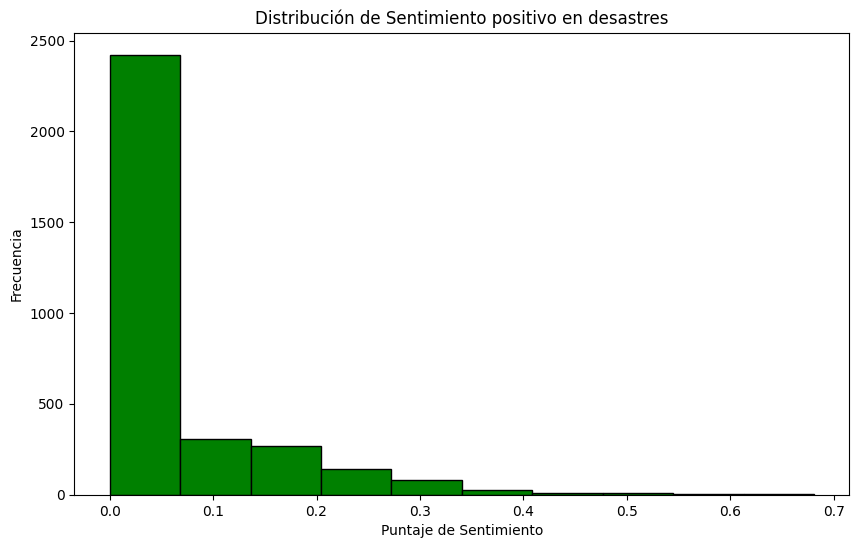

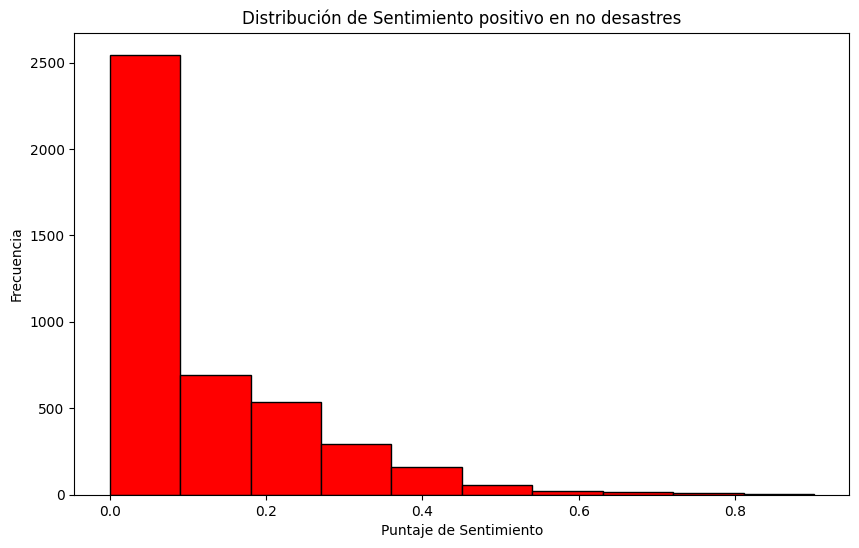

In [13]:
plt.figure(figsize=(10,6))
plt.hist(desastre_sentimientos_df['compound'], color="green", edgecolor="black")

plt.title("Distribución de Sentimiento general en desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(no_desastre_sentimientos_df['compound'], color="red", edgecolor="black")

plt.title("Distribución de Sentimiento general en no desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(desastre_sentimientos_df['neg'], color="green", edgecolor="black")

plt.title("Distribución de Sentimiento negativo en desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show() 

plt.figure(figsize=(10,6))
plt.hist(no_desastre_sentimientos_df['neg'], color="red", edgecolor="black")

plt.title("Distribución de Sentimiento negativo en no desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(desastre_sentimientos_df['neu'], color="green", edgecolor="black")

plt.title("Distribución de Sentimiento neutral en desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show() 

plt.figure(figsize=(10,6))
plt.hist(no_desastre_sentimientos_df['neu'], color="red", edgecolor="black")

plt.title("Distribución de Sentimiento neutral en no desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show() 

plt.figure(figsize=(10,6))
plt.hist(desastre_sentimientos_df['pos'], color="green", edgecolor="black")

plt.title("Distribución de Sentimiento positivo en desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show() 

plt.figure(figsize=(10,6))
plt.hist(no_desastre_sentimientos_df['pos'], color="red", edgecolor="black")

plt.title("Distribución de Sentimiento positivo en no desastres")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show() 

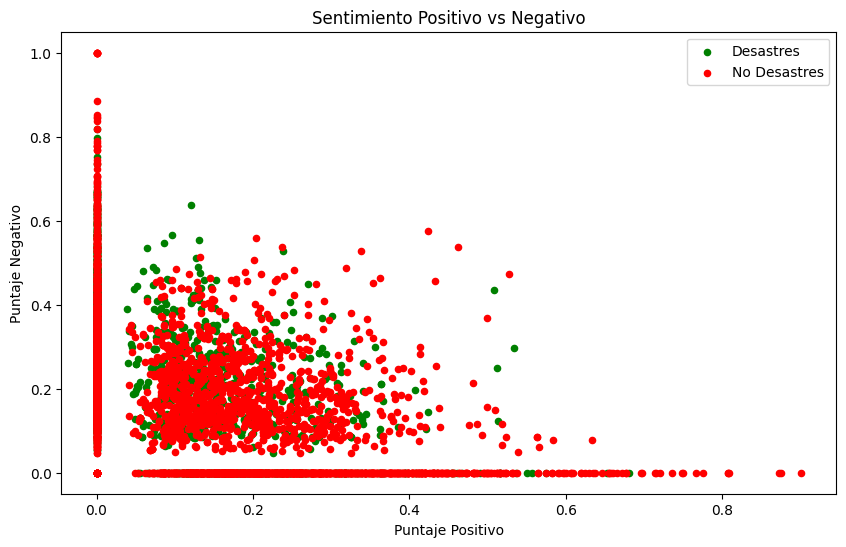

In [14]:
plt.figure(figsize=(10,6))

ax = plt.gca()
desastre_sentimientos_df.plot(kind='scatter', x='pos', y='neg', color='green', label='Desastres', ax=ax)
no_desastre_sentimientos_df.plot(kind='scatter', x='pos', y='neg', color='red', label='No Desastres', ax=ax)
plt.title("Sentimiento Positivo vs Negativo")
plt.xlabel("Puntaje Positivo")
plt.ylabel("Puntaje Negativo")
plt.legend()
plt.show()

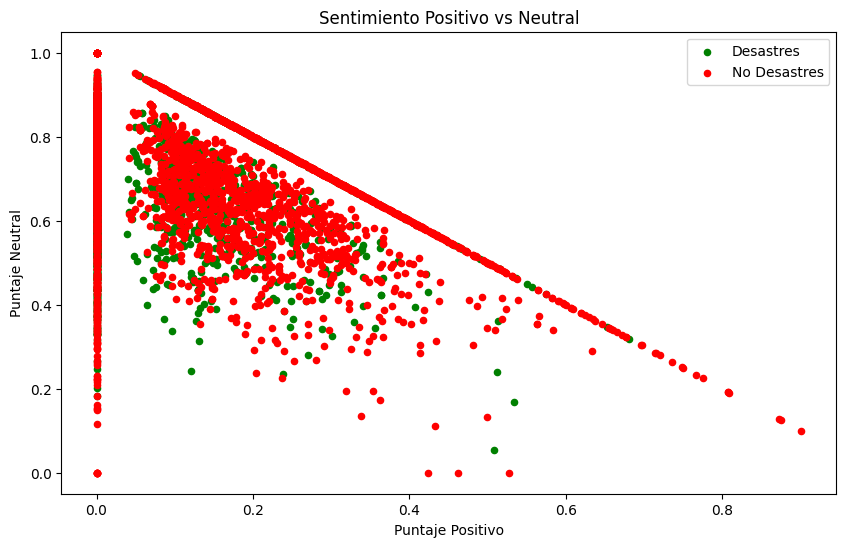

In [15]:
plt.figure(figsize=(10,6))

ax = plt.gca()
desastre_sentimientos_df.plot(kind='scatter', x='pos', y='neu', color='green', label='Desastres', ax=ax)
no_desastre_sentimientos_df.plot(kind='scatter', x='pos', y='neu', color='red', label='No Desastres', ax=ax)
plt.title("Sentimiento Positivo vs Neutral")
plt.xlabel("Puntaje Positivo")
plt.ylabel("Puntaje Neutral")
plt.legend()
plt.show()

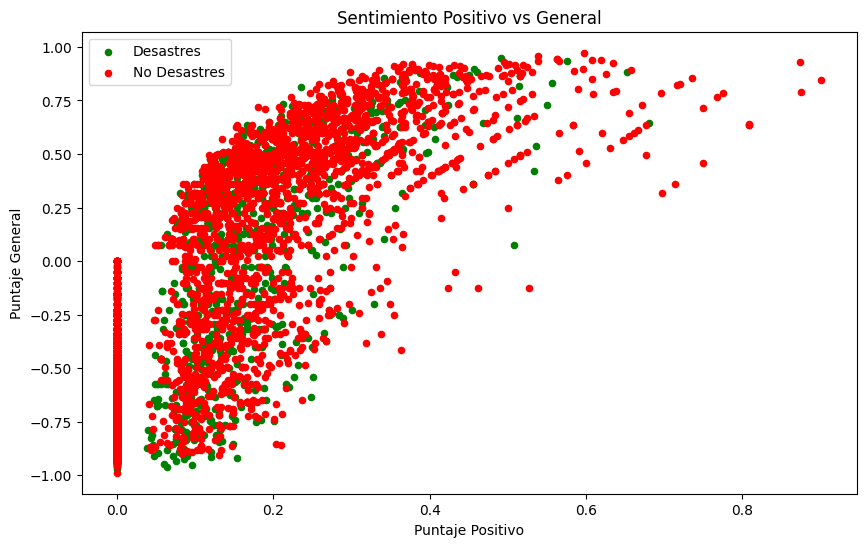

In [16]:
plt.figure(figsize=(10,6))

ax = plt.gca()
desastre_sentimientos_df.plot(kind='scatter', x='pos', y='compound', color='green', label='Desastres', ax=ax)
no_desastre_sentimientos_df.plot(kind='scatter', x='pos', y='compound', color='red', label='No Desastres', ax=ax)
plt.title("Sentimiento Positivo vs General")
plt.xlabel("Puntaje Positivo")
plt.ylabel("Puntaje General")
plt.legend()
plt.show()

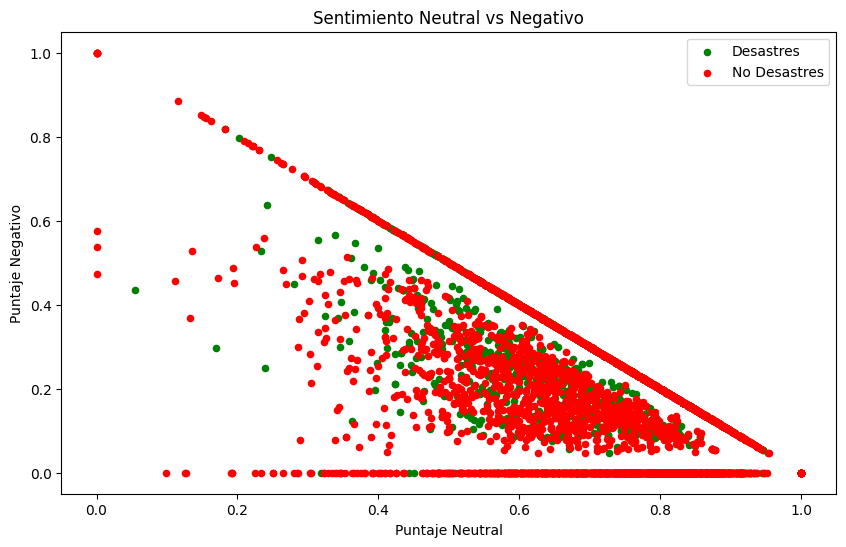

In [17]:
plt.figure(figsize=(10,6))

ax = plt.gca()
desastre_sentimientos_df.plot(kind='scatter', x='neu', y='neg', color='green', label='Desastres', ax=ax)
no_desastre_sentimientos_df.plot(kind='scatter', x='neu', y='neg', color='red', label='No Desastres', ax=ax)
plt.title("Sentimiento Neutral vs Negativo")
plt.xlabel("Puntaje Neutral")
plt.ylabel("Puntaje Negativo")
plt.legend()
plt.show()

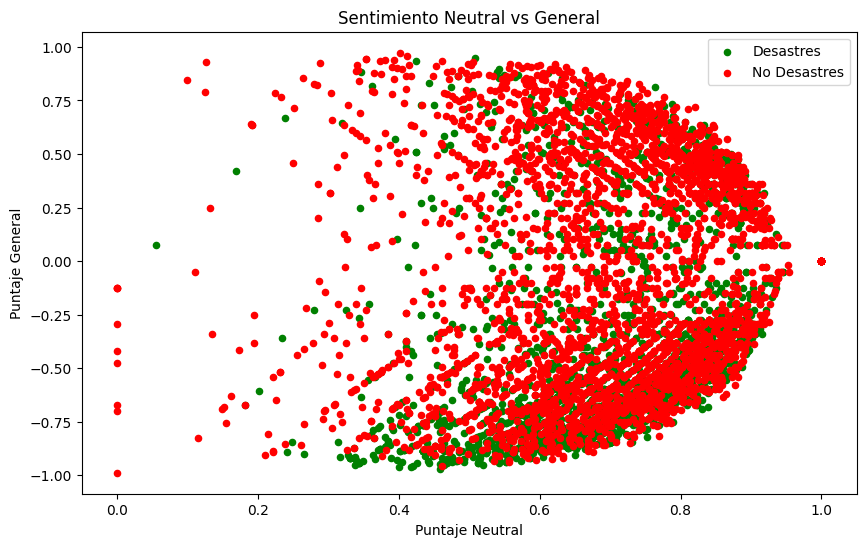

In [18]:
plt.figure(figsize=(10,6))

ax = plt.gca()
desastre_sentimientos_df.plot(kind='scatter', x='neu', y='compound', color='green', label='Desastres', ax=ax)
no_desastre_sentimientos_df.plot(kind='scatter', x='neu', y='compound', color='red', label='No Desastres', ax=ax)
plt.title("Sentimiento Neutral vs General")
plt.xlabel("Puntaje Neutral")
plt.ylabel("Puntaje General")
plt.legend()
plt.show()

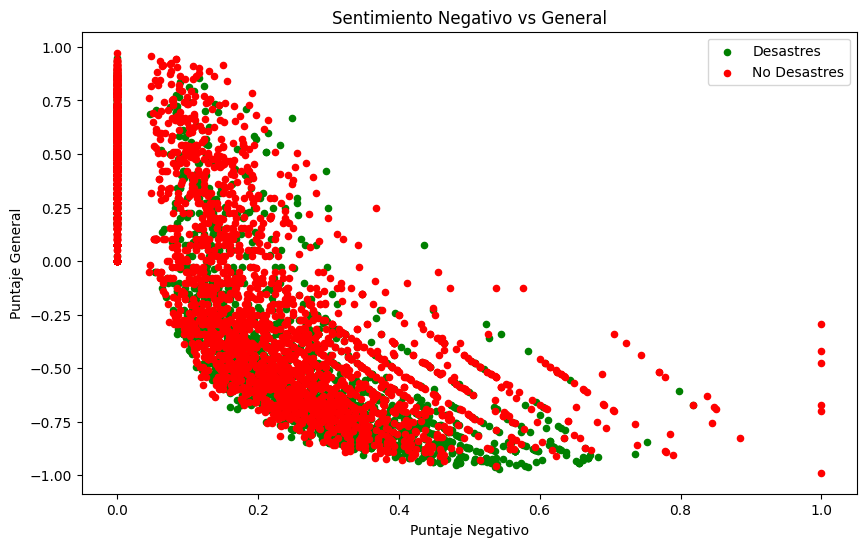

In [19]:
plt.figure(figsize=(10,6))

ax = plt.gca()
desastre_sentimientos_df.plot(kind='scatter', x='neg', y='compound', color='green', label='Desastres', ax=ax)
no_desastre_sentimientos_df.plot(kind='scatter', x='neg', y='compound', color='red', label='No Desastres', ax=ax)
plt.title("Sentimiento Negativo vs General")
plt.xlabel("Puntaje Negativo")
plt.ylabel("Puntaje General")
plt.legend()
plt.show()

In [20]:
from transformers import pipeline

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

sentimientos = pd.DataFrame()
for text in desastres:
    res = sentiment_analyzer(text)[0]
    sentimientos = pd.concat([sentimientos, pd.DataFrame([res])], ignore_index=True)

/home/tomy07417/data-science/ml/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

2025-11-20 01:05:12.177567: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 01:05:12.713895: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 01:05:15.115272: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating